In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-12.868449193301217 53.67712526105029
29.276030129135876 -164.33084794229595
78.8196901816215 -41.07018714729381
-54.38318346938574 20.542467684388328
34.537041422610045 -28.8007044108773
55.24338423863827 -23.75633076015029
-20.860503770061555 37.49679981824718
48.81116288780021 43.992123927503656
-8.145617132707102 -44.33444676576448
-66.53151545344501 158.64379206866073
8.672245915492084 -124.73060378188464
-11.279863713376983 176.9692853891517
-10.635284201862518 -91.57406766270329
44.05675006471239 43.22425333673175
-57.9091139819428 7.572444684945111
19.210502613851403 172.63691058690972
10.13713010516868 128.00334531725957
-7.117816311647786 17.771340927321972
77.4901913452473 92.62168308459849
-62.474743417444216 -86.8191089275789
-43.422068286655765 -162.08190344710331
-9.523917748605669 143.41237849700155
73.2947781233905 124.02955429548769
-89.79021890519631 70.66949984569825
52.66423537971019 176.81031013436757
-16.704468700200295 -165.15385484139932
31.03674731037711 -63.3

In [5]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?&appid=0a4afbf401a81dbdc922bb701a0ee3b9"
print(url)

https://api.openweathermap.org/data/2.5/weather?&appid=0a4afbf401a81dbdc922bb701a0ee3b9


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

https://api.openweathermap.org/data/2.5/weather?&appid=0a4afbf401a81dbdc922bb701a0ee3b9&q=Boston


In [11]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [14]:
# Get the text of the 'Get' request.
city_weather.text


'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":281.62,"feels_like":280.75,"temp_min":277.8,"temp_max":283.76,"pressure":1010,"humidity":61},"visibility":10000,"wind":{"speed":1.79,"deg":287,"gust":4.02},"clouds":{"all":2},"dt":1666223681,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1666177292,"sunset":1666216592},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [15]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 281.62,
  'feels_like': 280.75,
  'temp_min': 277.8,
  'temp_max': 283.76,
  'pressure': 1010,
  'humidity': 61},
 'visibility': 10000,
 'wind': {'speed': 1.79, 'deg': 287, 'gust': 4.02},
 'clouds': {'all': 2},
 'dt': 1666223681,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1666177292,
  'sunset': 1666216592},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")


City Weather found.


In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [18]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 281.62,
  'feels_like': 280.75,
  'temp_min': 277.8,
  'temp_max': 283.76,
  'pressure': 1010,
  'humidity': 61},
 'visibility': 10000,
 'wind': {'speed': 1.79, 'deg': 287, 'gust': 4.02},
 'clouds': {'all': 2},
 'dt': 1666223681,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1666177292,
  'sunset': 1666216592},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [19]:
# Get the JSON data.
boston_data = city_weather.json()

In [20]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1666177292,
 'sunset': 1666216592}

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 283.76 61 2 1.79


In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')


'2022-10-19 23:54:41'

In [23]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [29]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | sambava
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | grindavik
Processing Record 7 of Set 1 | beira
Processing Record 8 of Set 1 | novyy rogachik
Processing Record 9 of Set 1 | bom jesus
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | asau
Processing Record 13 of Set 1 | san cristobal
Processing Record 14 of Set 1 | podkumskiy
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | pilar
Processing Record 18 of Set 1 | kasongo-lunda
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | daru
Processing Record 23 of Set 1 | tiksi
Processing Record 24 of Set 1 | taolanaro
City not fo

Processing Record 38 of Set 4 | neiafu
Processing Record 39 of Set 4 | port alfred
Processing Record 40 of Set 4 | winchester
Processing Record 41 of Set 4 | vegreville
Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | susanville
Processing Record 44 of Set 4 | ebano
City not found. Skipping...
Processing Record 45 of Set 4 | laguna
Processing Record 46 of Set 4 | khonuu
City not found. Skipping...
Processing Record 47 of Set 4 | provideniya
Processing Record 48 of Set 4 | oranjemund
Processing Record 49 of Set 4 | kansanshi
Processing Record 50 of Set 4 | amderma
City not found. Skipping...
Processing Record 1 of Set 5 | stony plain
Processing Record 2 of Set 5 | alipur duar
City not found. Skipping...
Processing Record 3 of Set 5 | mombetsu
Processing Record 4 of Set 5 | airai
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | rio cuarto
Processing Record 7 of Set 5 | sofiysk
City not found. Skipping...
Processing Record 8 of Set 5 | te anau
Pro

Processing Record 26 of Set 8 | los llanos de aridane
Processing Record 27 of Set 8 | kleck
City not found. Skipping...
Processing Record 28 of Set 8 | nemuro
Processing Record 29 of Set 8 | lufilufi
Processing Record 30 of Set 8 | mildura
Processing Record 31 of Set 8 | adrar
Processing Record 32 of Set 8 | nantucket
Processing Record 33 of Set 8 | winona
Processing Record 34 of Set 8 | port augusta
Processing Record 35 of Set 8 | okakarara
Processing Record 36 of Set 8 | sorland
Processing Record 37 of Set 8 | poum
Processing Record 38 of Set 8 | udachnyy
Processing Record 39 of Set 8 | urumqi
Processing Record 40 of Set 8 | port macquarie
Processing Record 41 of Set 8 | prainha
Processing Record 42 of Set 8 | mahanje
Processing Record 43 of Set 8 | hay river
Processing Record 44 of Set 8 | tuy hoa
Processing Record 45 of Set 8 | broken hill
Processing Record 46 of Set 8 | oussouye
Processing Record 47 of Set 8 | vung tau
Processing Record 48 of Set 8 | santa maria
Processing Record 

Processing Record 14 of Set 12 | mormugao
Processing Record 15 of Set 12 | ouesso
Processing Record 16 of Set 12 | sorvag
City not found. Skipping...
Processing Record 17 of Set 12 | shache
Processing Record 18 of Set 12 | fremont
Processing Record 19 of Set 12 | nebbi
Processing Record 20 of Set 12 | padang
Processing Record 21 of Set 12 | burica
City not found. Skipping...
Processing Record 22 of Set 12 | asyut
Processing Record 23 of Set 12 | darhan
Processing Record 24 of Set 12 | tazovskiy
Processing Record 25 of Set 12 | pio xii
Processing Record 26 of Set 12 | plettenberg bay
Processing Record 27 of Set 12 | tezu
Processing Record 28 of Set 12 | dom pedro
Processing Record 29 of Set 12 | bargal
City not found. Skipping...
Processing Record 30 of Set 12 | sumedang
Processing Record 31 of Set 12 | burayevo
Processing Record 32 of Set 12 | bocaiuva
Processing Record 33 of Set 12 | chihuahua
Processing Record 34 of Set 12 | garowe
Processing Record 35 of Set 12 | svetlyy
Processing 

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sambava,-14.2667,50.1667,292.92,79,13,3.87,MG,2022-10-20 00:06:03
1,Kapaa,22.0752,-159.3190,300.33,74,75,8.75,US,2022-10-20 00:06:03
2,Tasiilaq,65.6145,-37.6368,274.24,97,100,3.44,GL,2022-10-20 00:06:04
3,Bredasdorp,-34.5322,20.0403,287.78,91,93,3.90,ZA,2022-10-20 00:06:04
4,Ribeira Grande,38.5167,-28.7000,291.91,76,100,4.02,PT,2022-10-20 00:06:05
5,Grindavik,63.8424,-22.4338,278.41,93,75,5.66,IS,2022-10-20 00:06:06
6,Beira,-19.8436,34.8389,296.72,79,98,2.28,MZ,2022-10-20 00:06:06
7,Novyy Rogachik,48.6768,44.0608,282.65,59,100,2.65,RU,2022-10-20 00:06:07
8,Bom Jesus,-9.0744,-44.3586,304.21,28,78,2.58,BR,2022-10-20 00:06:08
9,Bluff,-46.6000,168.3333,286.93,74,96,15.16,NZ,2022-10-20 00:06:09


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

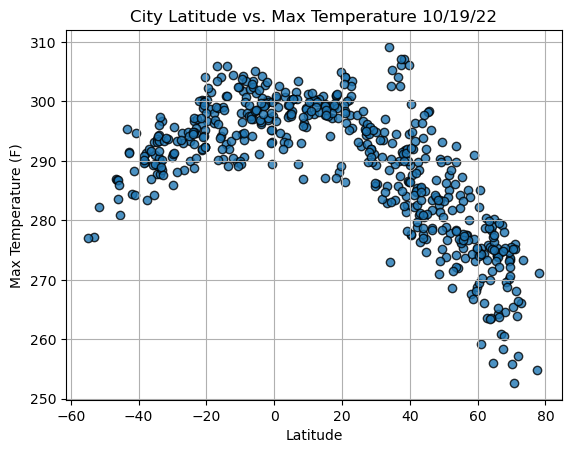

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

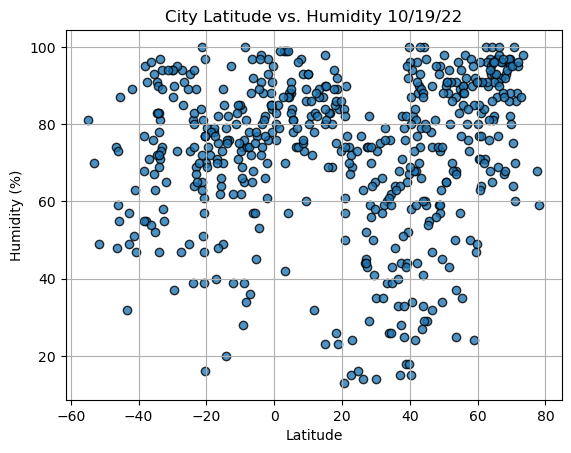

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

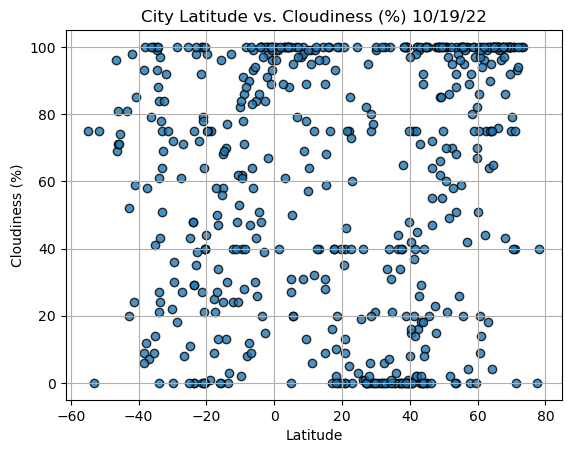

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


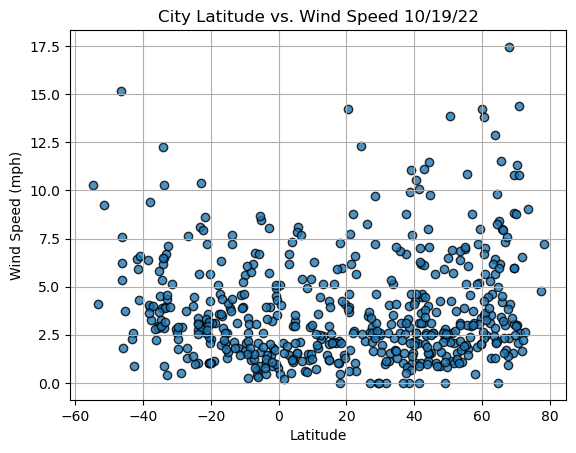

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()